# NAME : Ritvik Khandelwal
# SAP ID : 60002180081
# CLASS : TE EXTC 2

In [1]:
# Confidence Interval for the population proportion in python
import pandas as pd
import numpy as np
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df["Sex1"]=df.sex.replace({1:"Male",0:"Female"})

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [4]:
dx=df[["target","Sex1"]].dropna()
dx

,target,Sex1
0,0,Male
1,0,Male
2,0,Male
3,0,Male
4,0,Female
...,...,...
1020,1,Male
1021,0,Male
1022,0,Male
1023,1,Female


In [5]:
pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


### Confidence Interval for Female pop. proportion

In [6]:
# Female Poulation Proportion
p_fm=226/(86+226)
print(p_fm)

0.7243589743589743


In [7]:
# Size of Female Population
n_f=226+86

In [8]:
# Calculate Standard Error
se_female=np.sqrt(p_fm*(1-p_fm)/n_f)
print(se_female)

0.02529714756803247


In [9]:
# Confidence Interval for female pop. proportion
z_score=1.96
lcb=p_fm-z_score*se_female
ucb=p_fm+z_score*se_female
print(lcb,ucb)

0.6747765651256307 0.773941383592318


In [10]:
import statsmodels.api as sm
sm.stats.proportion_confint(n_f*p_fm,n_f)

(0.6747774762140357, 0.773940472503913)

In [ ]:
#with 95 percent confidence we can say that the proportion of female having heart disease will lie in the range that we have got.

### Confidence Interval for Male pop. proportion

In [11]:
# male Poulation Proportion
p_m=300/(300+413)
print(p_m)

0.42075736325385693


In [12]:
# Size of male Population
n_m=300+413

In [13]:
# Calculate Standard Error
se_male=np.sqrt(p_m*(1-p_m)/n_m)
print(se_male)

0.018488486410836908


In [14]:
# Confidence Interval for male pop. proportion
z_score=1.96
lcb=p_m-z_score*se_male
ucb=p_m+z_score*se_male
print(lcb,ucb)

0.3845199298886166 0.45699479661909725


In [15]:
import statsmodels.api as sm
sm.stats.proportion_confint(n_m*p_m,n_m)

(0.3845205957599584, 0.45699413074775547)

### Confidence Interval for Diff in pop. proportion

In [ ]:
#is the pop proportion of male with heart disease same as pop proportion of female with heart disease?

In [16]:
# Diff. in standard error of male and female pop.
se_diff=np.sqrt(se_female**2+se_male**2)
se_diff

0.03133320610538462

In [17]:
# Confidence Interval for diff. in pop. proportion
# d = female pop. proportion - male pop. proportion
d=0.7243589743589743-0.42075736325385693 
lcb=d-1.96*se_diff
ucb=d+1.96*se_diff
print(lcb,ucb)

0.24218852713856356 0.3650146950716713


Null Hypothesis : Population Proportion is same for male and female

Since the confidence interval is b/w 0.24 and 0.36 we have to reject the null hypothesis as the confidence interval does not include 0.

### Confidence Interval for mean pop. proportion

In [18]:
z=df.groupby("Sex1").agg({"chol":[np.mean,np.std,np.size]})
z

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

#### FEMALE

In [19]:
mean_f=261.455128
std_f=64.466781
size_f=312
z=1.96

In [20]:
# Confidence Interval of Mean pop. proportion for female
se=std_f/np.sqrt(size_f)
lcb=mean_f-z*se
ucb=mean_f+z*se
print(lcb,ucb)

254.30169095203016 268.6085650479699


#### MALE

In [21]:
mean_m=239.237027
std_m=43.155535
size_m=713
z=1.96

In [22]:
# Confidence Interval of Mean pop. proportion for female
se=std_m/np.sqrt(size_m)
lcb=mean_m-z*se
ucb=mean_m+z*se
print(lcb,ucb)

236.0692995254539 242.4047544745461


### Confidence Interval for diff. in mean pop. proportion

In [23]:
n_f=312
n_m=713
mean_f=261.455128
mean_m=239.237027
std_f=64.466781
std_m=43.155535

In [24]:
# Unpooled Approach is more appropriate as standard deviation of the two target pop. is diff. so the variance will be diff. as well
sem_f=std_f/np.sqrt(n_f)
sem_m=std_m/np.sqrt(n_m)

In [25]:
# Diff. in mean of the two samples
mean_d=mean_f-mean_m

In [26]:
# Using formula for unpooled approach, calculate diff. in standard error
sem_d=(np.sqrt((n_f-1)*sem_f**2+(n_m-1)*sem_m**2)/(n_f+n_m-2))*(np.sqrt(1/n_f + 1/n_m))

In [27]:
# Confidence Interval for diff. in mean
lcb=mean_d-1.96*sem_d
ucb=mean_d+1.96*sem_d
print(lcb,ucb)

22.20802509671433 22.22817690328565


In [ ]:
#so we can conclude that there is no difference in mean of male and female pop proportion.


# IBM_AS_T_test_SND

In [28]:
import numpy as np
from numpy.random import seed, randn
import scipy.stats as ss
from scipy.stats import ttest_ind
seed(1)

In [29]:
data1=5*randn(100)+25
data2=5*randn(100)+45
print(data1)

[33.12172682 21.94121793 22.35914124 19.63515689 29.32703815 13.49230652
 33.72405882 21.1939655  26.59519548 23.75314812 32.31053969 14.69929645
 23.38791398 23.07972823 30.66884721 19.50054366 24.13785896 20.61070791
 25.21106873 27.91407607 19.49690411 30.72361855 29.5079536  27.51247169
 29.50427975 21.5813607  24.38554887 20.32115283 23.6605596  27.65177733
 21.54169624 23.01623237 21.5641365  20.77397179 21.64376935 24.93667701
 19.41344826 26.17207849 33.29901089 28.7102208  24.04082224 20.56185518
 21.26420853 33.46227301 25.25403877 21.81502177 25.95457742 35.50127568
 25.60079476 28.08601555 26.5008516  23.23875077 19.28740901 23.25328639
 23.95552883 27.93311596 29.19491707 29.65551041 26.42793663 29.42570582
 21.2280103  31.26434078 27.5646491  23.50953582 27.44259073 24.62214143
 30.65814694 32.59908408 35.92787703 18.01751832 17.77943097 22.47767069
 25.80018535 29.38084461 26.57817474 14.88899392 23.46897994 29.13987321
 26.15047368 28.8100559  23.88835929 23.99620966 25

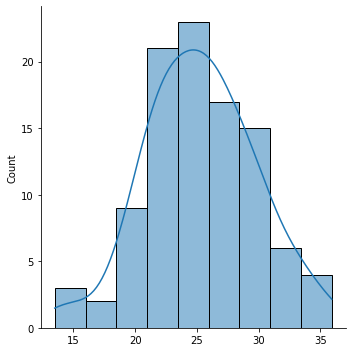

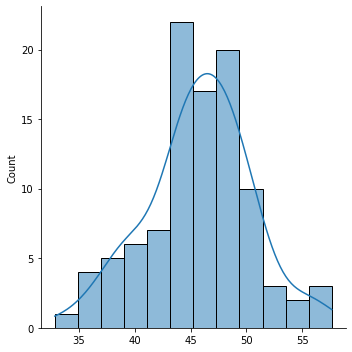

In [30]:
import seaborn as sns
sns.displot(data1,kde=True)
sns.displot(data2,kde=True)

In [31]:
mean1,mean2=np.mean(data1),np.mean(data2)
print(mean1,mean2)

25.302914260378493 45.763973888101


In [32]:
se1,se2=ss.stats.sem(data1),ss.stats.sem(data2) #calc standard error 1 and standard error 2
print(se1)
print(se2)

0.4448077336562061
0.4683450175839384


In [33]:
sed=np.sqrt(se1**2.0+se2**2.0) #calc standard error difference
t_stat=(mean1-mean2)/sed
df1=len(data1)+len(data2)-2 #degree of freedom
print(df1)

198


In [34]:
alpha=0.05
cv=ss.t.ppf(1-alpha,df1)
p=(1.0-ss.t.cdf(abs(t_stat),df1))*2.0
print(p)

0.0


In [35]:
# Using CI for diff. in mean pop. proportion method
n_d1=len(data1)
n_d2=len(data2)
mean_d1=mean1
mean_d2=mean2
std_d1=np.std(data1)
std_d2=np.std(data2)

In [36]:
sem_d1=std_d1/np.sqrt(n_d1)
sem_d2=std_d2/np.sqrt(n_d2)

In [37]:
mean_d=mean_d1-mean_d2

In [38]:
# Using formula for unpooled approach, calculate diff. in standard error
sem_d=(np.sqrt((n_d1-1)*sem_d1**2+(n_d2-1)*sem_d2**2)/(n_d1+n_d2-2))*(np.sqrt(1/n_d1 + 1/n_d2))

In [39]:
# Confidence Interval for diff. in mean
lcb=mean_d-1.96*sem_d
ucb=mean_d+1.96*sem_d
print(lcb,ucb)

-20.470011496988636 -20.452107758456375
